# **Importing Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv('train.csv')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape

(1820, 21)

# **Dataset Visualization**

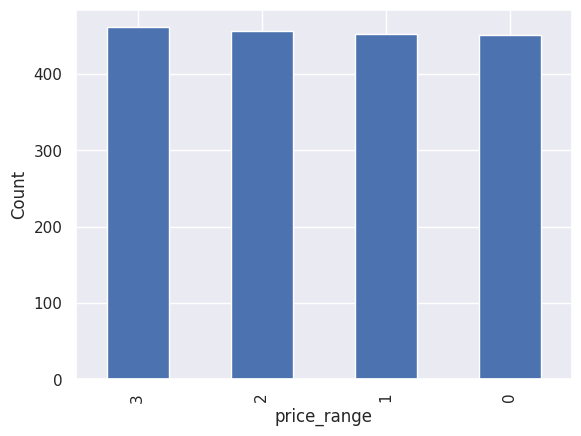

In [5]:
sns.set()
price_plot=train_data_f['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

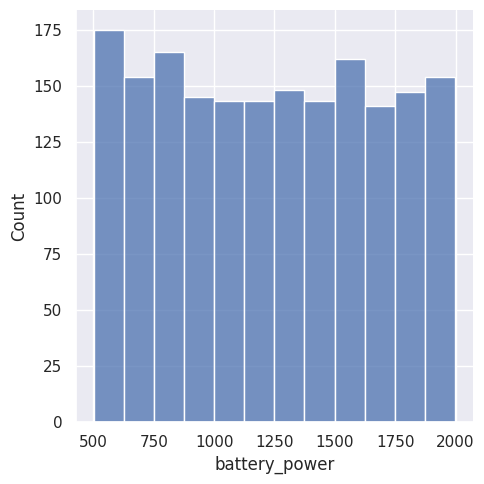

In [6]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["battery_power"])
plt.show()

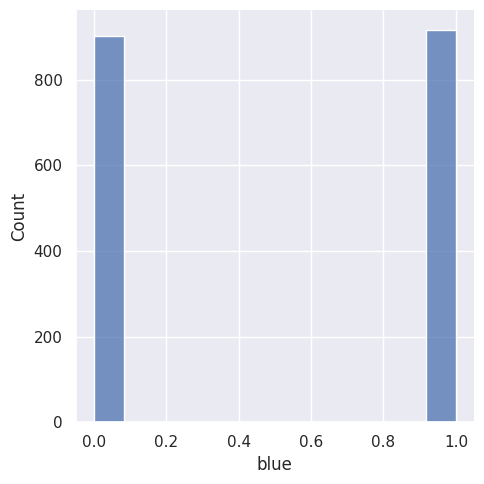

In [7]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["blue"])
plt.show()

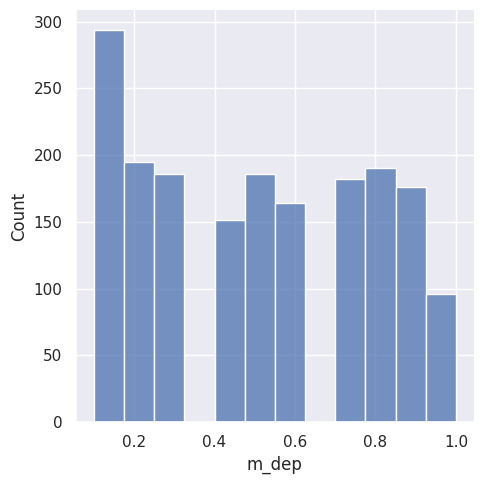

In [8]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["m_dep"])
plt.show()

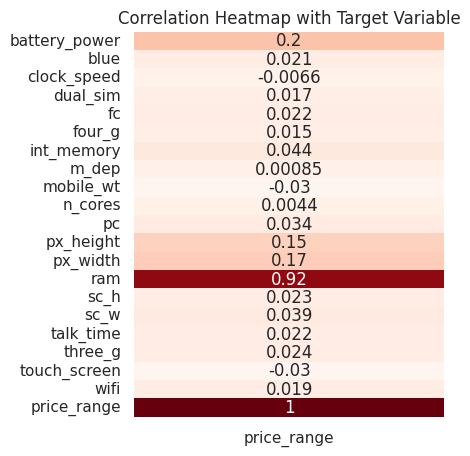

In [20]:
correlation_matrix = train_data.corr()

target_correlation = correlation_matrix['price_range']

plt.figure(figsize=(4, 5))
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='Reds', cbar=False)
plt.title('Correlation Heatmap with Target Variable')
plt.show()

# **Dataset Features**

In [9]:
X=train_data_f.drop(['price_range'], axis=1)
y=train_data_f['price_range']
#missing values
X.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

# **Utility Functions for Model Evaluation**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.21, random_state=7)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tabulate import tabulate
from sklearn.metrics import classification_report
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    # Assuming you have already defined y_test and y_pred
    report = classification_report(y_test, y_pred)
    table = tabulate([list(map(str.strip, line.split())) for line in report.split('\n')], headers='firstrow', tablefmt='orgtbl')

    print(f'+{"-" * len(table.splitlines()[0])}+')
    print(table)
    print(f'+{"-" * len(table.splitlines()[0])}+')
    sns.heatmap(cm, annot=True, fmt='g', cbar=True, cmap='viridis')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

# **KNN Implementation**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)

In [13]:
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)

KNN Classifier Accuracy Score:  0.9347258485639687
+---------------------------------------------------+
| precision   | recall   |   f1-score |   support |
|-------------+----------+------------+-----------|
|             |          |            |           |
| 0           | 0.99     |       0.98 |      0.98 |
| 1           | 0.93     |       0.97 |      0.95 |
| 2           | 0.88     |       0.88 |      0.88 |
| 3           | 0.94     |       0.91 |      0.92 |
|             |          |            |           |
| accuracy    | 0.93     |     383    |           |
| macro       | avg      |       0.93 |      0.93 |
| weighted    | avg      |       0.93 |      0.93 |
|             |          |            |           |
+---------------------------------------------------+


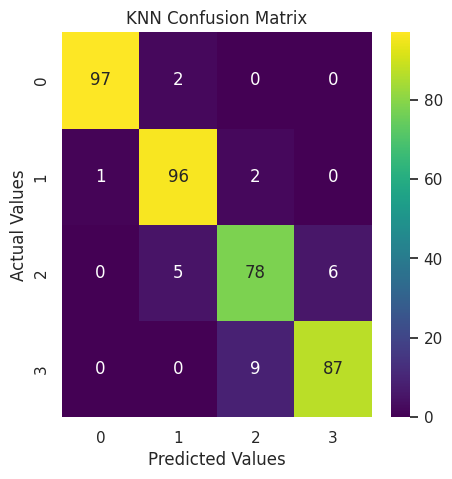

In [14]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

# **SVM Implementation**

In [15]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)

SVM Classifier Accuracy Score:  0.9608355091383812
+---------------------------------------------------+
| precision   | recall   |   f1-score |   support |
|-------------+----------+------------+-----------|
|             |          |            |           |
| 0           | 0.98     |       0.98 |      0.98 |
| 1           | 0.93     |       0.97 |      0.95 |
| 2           | 0.94     |       0.93 |      0.94 |
| 3           | 0.99     |       0.96 |      0.97 |
|             |          |            |           |
| accuracy    | 0.96     |     383    |           |
| macro       | avg      |       0.96 |      0.96 |
| weighted    | avg      |       0.96 |      0.96 |
|             |          |            |           |
+---------------------------------------------------+


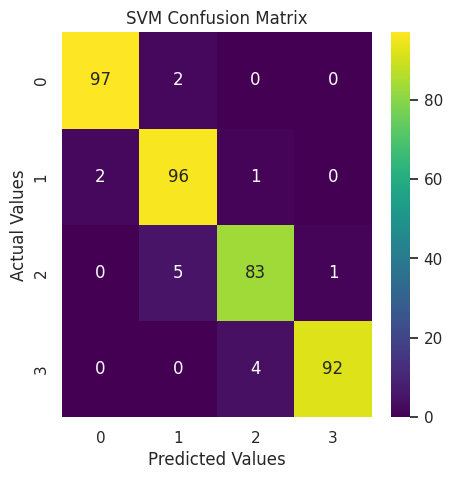

In [16]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

# **Gaussian NB Classifier Implementation**

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [18]:
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)

Gaussian NB Classifier Accuracy Score:  0.8459530026109661
+---------------------------------------------------+
| precision   | recall   |   f1-score |   support |
|-------------+----------+------------+-----------|
|             |          |            |           |
| 0           | 0.92     |       0.92 |      0.92 |
| 1           | 0.80     |       0.73 |      0.76 |
| 2           | 0.73     |       0.81 |      0.77 |
| 3           | 0.93     |       0.93 |      0.93 |
|             |          |            |           |
| accuracy    | 0.85     |     383    |           |
| macro       | avg      |       0.85 |      0.85 |
| weighted    | avg      |       0.85 |      0.85 |
|             |          |            |           |
+---------------------------------------------------+


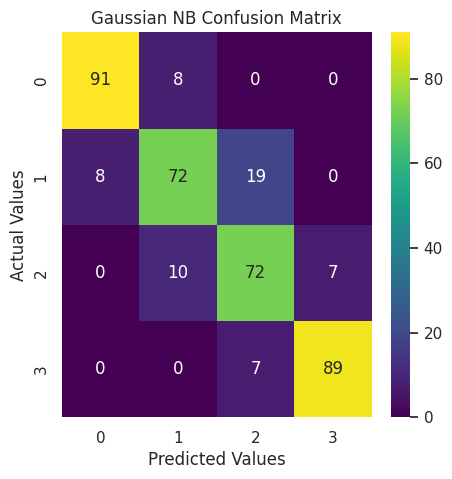

In [19]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')

# **ANN Implementation**

In [21]:
X = train_data.iloc[:,0:20]
y = train_data.iloc[:,-1]

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [23]:
selector = SelectKBest(score_func=f_classif)

X_selected = selector.fit_transform(X, y)

feature_scores = selector.scores_

In [24]:
df_features = pd.DataFrame(feature_scores)
df_columns = pd.DataFrame(X.columns)
featureScores = pd.concat([df_columns,df_features],axis=1)
featureScores.columns = ['Features','Score']
feature = featureScores.sort_values(by='Score',ascending=False)
print(feature)

         Features        Score
13            ram  3520.110824
0   battery_power    31.598158
12       px_width    22.620882
11      px_height    19.484842
8       mobile_wt     3.594318
6      int_memory     2.922996
9         n_cores     2.625415
14           sc_h     2.225984
15           sc_w     1.671000
16      talk_time     1.628811
7           m_dep     1.500682
18   touch_screen     1.293302
5          four_g     1.059525
10             pc     0.825446
4              fc     0.772182
2     clock_speed     0.493708
1            blue     0.476768
17        three_g     0.457320
3        dual_sim     0.428239
19           wifi     0.284940


In [26]:
#X = df[['ram','px_height','battery_power','px_width','dual_sim','int_memory','sc_w','wifi','talk_time','pc']] #mutual_info_classif
X = train_data[['ram','battery_power','px_width','px_height','mobile_wt','int_memory','n_cores','sc_h','sc_w','talk_time']]
#X = df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h']] #chi2
X

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,n_cores,sc_h,sc_w,talk_time
0,2549,842,756,20,188,7,2,9,7,19
1,2631,1021,1988,905,136,53,3,17,3,7
2,2603,563,1716,1263,145,41,5,11,2,9
3,2769,615,1786,1216,131,10,6,16,8,11
4,1411,1821,1212,1208,141,44,2,8,2,15
...,...,...,...,...,...,...,...,...,...,...
1995,668,794,1890,1222,106,2,6,13,4,19
1996,2032,1965,1965,915,187,39,4,11,10,16
1997,3057,1911,1632,868,108,36,8,9,1,5
1998,869,1512,670,336,145,46,5,18,10,19


In [27]:
X = X.values
y = y.values
print(X.shape,y.shape)

(2000, 10) (2000,)


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
y = y.reshape(-1,1)
y.shape

(2000, 1)

In [30]:
from sklearn.preprocessing import OneHotEncoder
ohot = OneHotEncoder()
y = ohot.fit_transform(y)
print(y)

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 3)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 1)	1.0
  (13, 2)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 3)	1.0
  (17, 3)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 3)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (1975, 3)	1.0
  (1976, 0)	1.0
  (1977, 2)	1.0
  (1978, 1)	1.0
  (1979, 1)	1.0
  (1980, 1)	1.0
  (1981, 1)	1.0
  (1982, 2)	1.0
  (1983, 2)	1.0
  (1984, 1)	1.0
  (1985, 3)	1.0
  (1986, 1)	1.0
  (1987, 0)	1.0
  (1988, 1)	1.0
  (1989, 1)	1.0
  (1990, 0)	1.0
  (1991, 3)	1.0
  (1992, 0)	1.0
  (1993, 3)	1.0
  (1994, 3)	1.0
  (1995, 0)	1.0
  (1996, 2)	1.0
  (1997, 3)	1.0
  (1998, 0)	1.0
  (1999, 3)	1.0


In [31]:
y = y.toarray()
print(y)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [33]:
import keras
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim = 10))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
Total params: 170 (680.00 Byte)
Trainable params: 170 (680.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
history = model.fit(X_train,y_train,epochs=1000,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/1000
25/25 [==============================] - 2s 26ms/step - loss: 1.3922 - accuracy: 0.2600 - val_loss: 1.3753 - val_accuracy: 0.2975
Epoch 2/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.3669 - accuracy: 0.2800 - val_loss: 1.3547 - val_accuracy: 0.3125
Epoch 3/1000
25/25 [==============================] - 0s 8ms/step - loss: 1.3452 - accuracy: 0.3156 - val_loss: 1.3328 - val_accuracy: 0.3700
Epoch 4/1000
25/25 [==============================] - 0s 12ms/step - loss: 1.3214 - accuracy: 0.3756 - val_loss: 1.3077 - val_accuracy: 0.4000
Epoch 5/1000
25/25 [==============================] - 0s 11ms/step - loss: 1.2937 - accuracy: 0.4300 - val_loss: 1.2769 - val_accuracy: 0.4350
Epoch 6/1000
25/25 [==============================] - 0s 9ms/step - loss: 1.2591 - accuracy: 0.4550 - val_loss: 1.2374 - val_accuracy: 0.4675
Epoch 7/1000
25/25 [==============================] - 0s 9ms/step - loss: 1.2186 - accuracy: 0.4744 - val_loss: 1.1912 - val_accuracy: 0.4975
Epo

In [37]:
y_pred = model.predict(X_test)

#lets do the inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

# also inverse encoding for y_test labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

13/13 [==============================] - 0s 2ms/step


In [44]:
# accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test) * 100
print("Accuracy of Your Model is = " + str(acc) +"%")

Accuracy of Your Model is = 95.25%


In [39]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate true positives, false positives, and false negatives
tp = np.diag(confusion_mat)
fp = np.sum(confusion_mat, axis=0) - tp
fn = np.sum(confusion_mat, axis=1) - tp

# Calculate recall
recall = tp / (tp + fn)

# Calculate precision
precision = tp / (tp + fp)

# Calculate F1 score
f1 = 2 * (precision * recall) / (precision + recall)

from tabulate import tabulate

# Assuming you have calculated recall, precision, and f1

# Create a list of metric names
metric_names = ["Class", "Recall", "Precision", "F1 Score"]

# Create a list of class labels
class_labels = ["Class 1", "Class 2", "Class 3", "Class 4"]

# Create a list of metric values
metric_values = []
for i in range(len(class_labels)):
    metric_values.append([class_labels[i], recall[i], precision[i], f1[i]])

# Display the table
table = tabulate(metric_values, headers=metric_names, tablefmt="grid")
print(table)


13/13 [==============================] - 0s 2ms/step
+---------+----------+-------------+------------+
| Class   |   Recall |   Precision |   F1 Score |
+=========+==========+=============+============+
| Class 1 | 0.99     |    0.970588 |   0.980198 |
+---------+----------+-------------+------------+
| Class 2 | 0.919192 |    0.968085 |   0.943005 |
+---------+----------+-------------+------------+
| Class 3 | 0.958333 |    0.893204 |   0.924623 |
+---------+----------+-------------+------------+
| Class 4 | 0.942857 |    0.980198 |   0.961165 |
+---------+----------+-------------+------------+


In [40]:
from tabulate import tabulate
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have y_test and y_pred from your ANN model

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Create a list of metric names and corresponding values
metric_names = ['Mean Squared Error', 'Mean Absolute Error']
metric_values = [mse, mae]

# Create a list of lists for the table data
table_data = [[metric_name, metric_value] for metric_name, metric_value in zip(metric_names, metric_values)]

# Format the table
table = tabulate(table_data, headers=['Metric', 'Value'], tablefmt='orgtbl')

# Print the table
print(table)

| Metric              |     Value |
|---------------------+-----------|
| Mean Squared Error  | 0.0191902 |
| Mean Absolute Error | 0.0251495 |


13/13 [==============================] - 0s 2ms/step
Confusion Matrix:
99	1	0	0	
3	91	5	0	
0	2	92	2	
0	0	6	99	


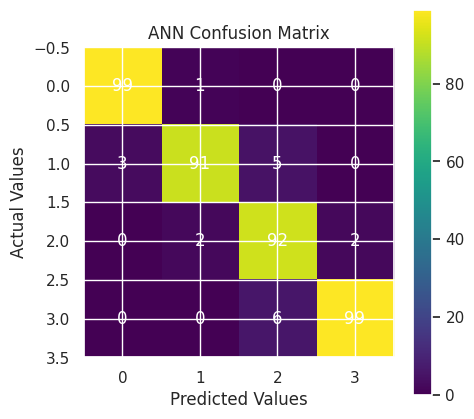

In [41]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to actual class labels
y_true_classes = np.argmax(y_test, axis=1)
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_true_classes, y_pred_classes)

print("Confusion Matrix:")
for row in confusion_mat:
    for value in row:
        print(value, end="\t")
    print()

# Visualize the confusion matrix
plt.imshow(confusion_mat, cmap='viridis')

# Add text annotations to the confusion matrix
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, confusion_mat[i, j], ha='center', va='center', color='white')

plt.title('ANN Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()